# Objective

### With the classification_data, build an algorithm to predict the binary label. Build a pipeline going from exploratory analysis to model performance evaluation.

### Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('classification_data.csv')

In [4]:
df.head()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,586266,1,1,18,4,2,1049,1,2,4,...,4,2,21,3,1,1,3,1,1,1
1,392565,1,1,9,4,0,2799,1,3,2,...,2,1,36,3,1,2,3,2,1,1
2,204665,1,2,12,2,9,841,2,4,2,...,4,1,23,3,1,1,2,1,1,1
3,393307,1,1,12,4,0,2122,1,3,3,...,2,1,39,3,1,2,2,2,1,2
4,627375,1,1,12,4,0,2171,1,3,4,...,4,2,38,1,2,2,2,1,1,2


### Checking the Data shape & Columns

In [5]:
df.shape

(1000, 22)

In [6]:
df.columns

Index(['user_id', 'label', 'Account type', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Savings type', 'Length of current employment', 'Instalment per cent',
       'Marital Status', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Age', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'Occupation',
       'No of dependents', 'Telephone', 'Foreign Worker'],
      dtype='object')

### Checking for Null and duplicate values in the data

In [7]:
df.isna().sum()

user_id                              0
label                                0
Account type                         0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Savings type                         0
Length of current employment         0
Instalment per cent                  0
Marital Status                       0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

### Checking the data types of the columns

In [9]:
df.dtypes

user_id                              int64
label                                int64
Account type                         int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Savings type                         int64
Length of current employment         int64
Instalment per cent                  int64
Marital Status                       int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age                                  int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

### Statistical description of the data

In [10]:
df.describe()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,396518.897000,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,225382.045777,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,505.000000,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201780.000000,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,395127.500000,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,586323.000000,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,797738.000000,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


### Dropping the User_id column as it is not needed in building the model

In [11]:
df1 = df.drop('user_id', axis=1)

### Checking the categories in the Target variable column and their value counts

In [12]:
df['label'].unique()

array([1, 0])

<Axes: ylabel='count'>

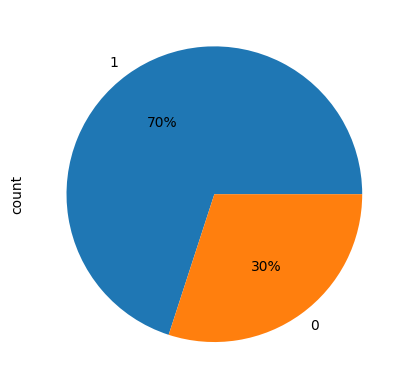

In [13]:
df['label'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

### There's an imbalance in the distribution of the label categories. so we fix this by adding stratify to the train-test split

## Feature correlation with the target variable

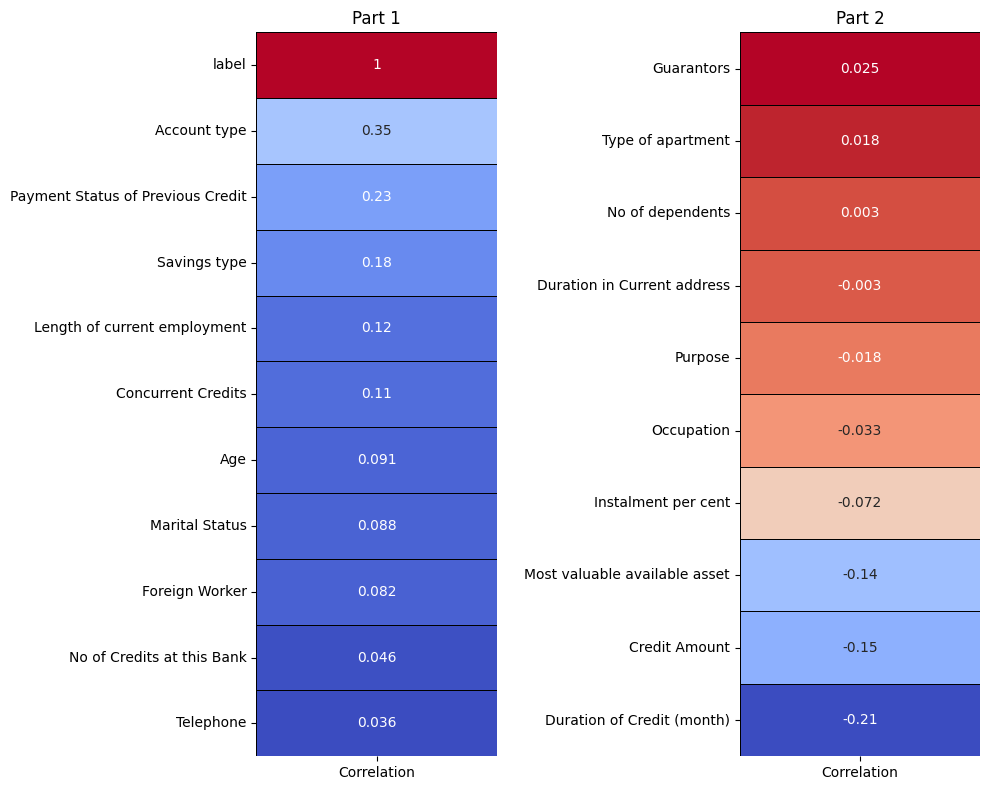

In [14]:
corr = df1.corrwith(df1['label']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlation']

colors = 'coolwarm'

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8))

plt.subplot(1, 2, 1)
sns.heatmap(corr.iloc[:11, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 1')

plt.subplot(1, 2, 2)
sns.heatmap(corr.iloc[11:21, :], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False)
plt.title('Part 2')

fig.tight_layout(w_pad=2)
plt.show()

### Preparing X and Y variables

In [15]:
x = df1.drop('label', axis = 1)
y = df1['label']

### Data transformation

In [18]:
num_feat = x.select_dtypes(exclude="object").columns

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_feat)
    ]
)

In [19]:
x = preprocessor.fit_transform(x)

In [20]:
x

array([[-1.25456565, -0.24085723,  1.34401408, ..., -0.42828957,
        -0.82331789, -0.19601428],
       [-1.25456565, -0.9875727 ,  1.34401408, ...,  2.33486893,
        -0.82331789, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428],
       ...,
       [ 1.13205258,  0.00804793,  1.34401408, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-0.45902624, -0.73866754, -0.50342796, ..., -0.42828957,
         1.21459768, -0.19601428],
       [-1.25456565,  0.75476341, -0.50342796, ..., -0.42828957,
        -0.82331789, -0.19601428]], shape=(1000, 20))

### Splitting the data into train-test split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify = y)

### Building the models and Evaluation

In [22]:
def evaluate_model(true, predicted):
    class_report = classification_report(true, predicted)
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    return accuracy, precision, class_report

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier()
    }
model_list = []
accuracy_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    accuracy, precision, class_report = evaluate_model(y_train, y_train_pred)
    accuracy, precision, class_report = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Class_report: {}".format(class_report))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.7700
- Precision: 0.8013
- Class_report:               precision    recall  f1-score   support

           0       0.66      0.48      0.56        60
           1       0.80      0.89      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

----------------------------------
Model performance for Test set
- Accuracy: 0.7700
- Precision: 0.8013
- Class_report:               precision    recall  f1-score   support

           0       0.66      0.48      0.56        60
           1       0.80      0.89      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200



KNN
Model performance for Training set
- Accuracy: 0.7300
- Precision: 0.7722
- Class_report:               preci

### Accuracies of the Models

In [27]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
2,Random Forest,0.79
0,Logistic Regression,0.77
1,KNN,0.73
3,Decision Trees,0.68


### Further evaluation of the best Model (Random Forest)

In [30]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
score = accuracy_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 80.00


### Confusion Matrix for the Random Forest model

<Axes: >

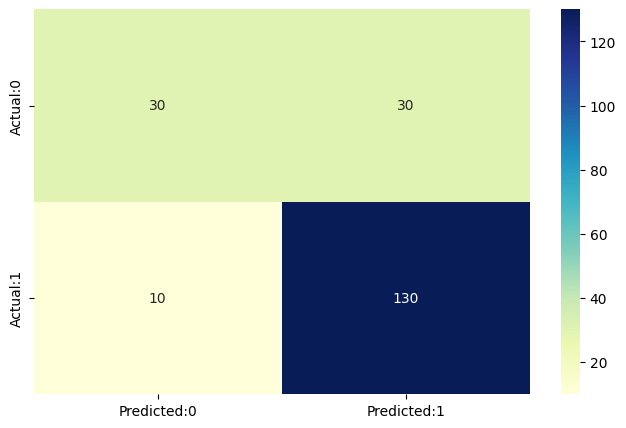

In [31]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Confusion Matrix Results

## True-Positive = 30
## True-Negative = 130
## False-Negative = 30
## False-Positive = 10

In [32]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
733,1,1,0
536,1,1,0
445,1,1,0
310,1,1,0
861,0,0,0
...,...,...,...
106,1,1,0
331,1,1,0
121,1,1,0
244,1,1,0


In [33]:
pred_df['Difference'].value_counts()

Difference
 0    160
-1     30
 1     10
Name: count, dtype: int64

# * Out of 200 customers, The model predicted 160 customer's category correctly and with an accuracy of 80%

# * Also our model is good at predicting category one (1) correctly